In [29]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy.interpolate import make_interp_spline
import turtle
import tensorflow as tf
from tensorflow import keras
import math 
import random
import sys

In [30]:
def click_event(event, x, y, flags, params):

    if event == cv2.EVENT_LBUTTONDOWN:
        x_arr.append(y)
        y_arr.append(x)
        for i in range(x-5, x+5):
            for j in range(y-5, y+5):
                img[j,i] = (255, 255, 255)

        cv2.imshow('image', img)

if __name__ == "__main__":

    x_arr = []
    y_arr = []
    img = cv2.imread('new.png', 1)

    cv2.imshow('image', img)

    cv2.setMouseCallback('image', click_event)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    # arr.append(arr[0])
    x_arr.append(x_arr[0])
    y_arr.append(y_arr[0])

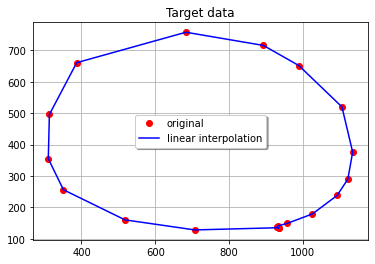

In [31]:
plt.plot(y_arr, x_arr, 'ro', label="original")
plt.plot(y_arr, x_arr, 'b', label="linear interpolation")
plt.title("Target data")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show()

In [32]:
u_i = []
k= 3 
n=len(x_arr)
for i in range (0,n+k+1):
    if(i<k):
        u_i.append(0)
    elif(i>=k and i<=n):
        u_i.append(i-k+1)
    elif(i>n):
        # print("hieeeee")
        u_i.append(n-k+2)

print(u_i, n-k+2)

u =0

n1 =[]
n2 =[]
n3=[]

P=[]
X_all=[]
Y_all=[]

for i in range(0,(n-k+2)*100):
    # print(n2)
    n1 = []
    n2 = []
    n3 = []
    if(i>0): u+=0.01
    for j in range(0, len(u_i)-1):
        if(u_i[j]<=u and u<u_i[j+1]):
            n1.append(1)
        else:
            n1.append(0)

    for j in range(0, len(n1)-2):
        # print(j)
        a = (u_i[j+k-1] - u_i[j])
        b = (u_i[j+k] - u_i[j+1])
        if(a==0 and b==0):
            N=0
        elif(a==0):
            N = ((u_i[j+k]-u)*n1[j+1])/b
        elif(b==0):
            N = ((u-u_i[j])*n1[j])/a
        else :
            N = ((u_i[j+k]-u)*n1[j+1])/b + ((u-u_i[j])*n1[j])/a
        n2.append(N)
    for j in range(0, len(n2)-2):
        # print(j)
        a = (u_i[j+k-1] - u_i[j])
        b = (u_i[j+k] - u_i[j+1])
        if(a==0 and b==0):
            N=0
        elif(a==0):
            N = ((u_i[j+k]-u)*n2[j+1])/b
        elif(b==0):
            N = ((u-u_i[j])*n2[j])/a
        else :
            N = ((u_i[j+k]-u)*n2[j+1])/b + ((u-u_i[j])*n2[j])/a
        n3.append(N)
        # print(n3)
    temp_x = 0.0
    temp_y = 0.0
    for i in range(0,len(n3)):
        temp_x += y_arr[i]*n3[i] 
        
    for i in range(0,n-3):
        temp_y += x_arr[i]*n3[i] 

    P.append([temp_x, temp_y])
    X_all.append(temp_x)
    Y_all.append(temp_y)

print(len(Y_all))

for i in range(0, 355):
    X_all.pop()
    Y_all.pop()

print(len(Y_all))
print(Y_all)

[0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 19, 19] 19
1900
1545
[135.0, 134.89615, 134.7946, 134.69535, 134.5984, 134.50375, 134.4114, 134.32134999999997, 134.2336, 134.14815000000002, 134.065, 133.98415000000003, 133.9056, 133.82934999999998, 133.7554, 133.68375, 133.6144, 133.54735, 133.4826, 133.42014999999998, 133.36, 133.30215, 133.2466, 133.19335, 133.1424, 133.09375, 133.04740000000004, 133.00335, 132.9616, 132.92215000000002, 132.88500000000002, 132.85014999999999, 132.81760000000003, 132.78735, 132.7594, 132.73375000000001, 132.71040000000002, 132.68935, 132.6706, 132.65415000000002, 132.64000000000001, 132.62815, 132.61860000000001, 132.61135000000002, 132.6064, 132.60375, 132.6034, 132.60535000000002, 132.6096, 132.61615, 132.625, 132.63615, 132.6496, 132.66535000000002, 132.6834, 132.70375, 132.7264, 132.75135, 132.77859999999998, 132.80815, 132.84, 132.87415, 132.9106, 132.94934999999998, 132.99040000000002, 133.03375, 133.07940000000002, 

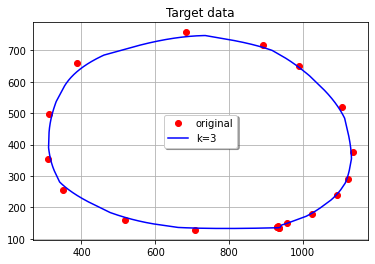

In [33]:
plt.plot(y_arr, x_arr, 'ro', label="original")
plt.plot(X_all, Y_all, 'b', label="k=3")
plt.title("Target data")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show()

In [36]:
## Mapping track using general geometry

## the purpose of this code is to map parallel points in order to give the track some thickness
## this function uses line and circular geometry to basically find points at perpendicular distances which indeed form parallel track lines

from cmath import sqrt

allpointsX = []
allpointsY = []

maxX = max(X_all)
minX = min(X_all)
maxY = max(Y_all)
minY = min(Y_all)

center = [(maxX+minX)/2, (maxY+minY)/2]
centX = (maxX+minX)/2
centY = (maxY+minY)/2

def sqr(x):
    return x*x

def points(X, Y, t):
    xtemp1 =[]
    xtemp2 =[]
    ytemp1 =[]
    ytemp2 =[]
    
    for i in range(0, len(X_all)-1):
        if (Y[i+1] != Y[i] and X[i+1] != X[i]):
            m = (Y[i+1]-Y[i])/(X[i+1]-X[i])
            yy = Y[i]
            xx = X[i]

            # print(xx, yy)

            c = yy-m*xx
            d = yy+xx/m

            a = (1+sqr(1/m))
            b = (-2*xx - 2*d/m + 2*yy/m)
            e = sqr(xx) + sqr(yy) - 2*d*yy - sqr(t) + sqr(d)

            if (sqr(b)-4*a*e >= 0):
                x1 = (-b+sqrt(sqr(b)-4*a*e))/(2*a)
                # print(1+sqr(1/m))
                x2 = (-b-sqrt(sqr(b)-4*a*e))/(2*a)

                y1 = -x1/m + d
                y2 = -x2/m + d
                cent1 = sqrt(sqr(centX - x1) + sqr(centY - y1))
                cent2 = sqrt(sqr(centX - x2) + sqr(centY - y2))
                if (y1.real < 1000 and y1.real > 0):
                    if(cent1.real>cent2.real):
                        xtemp1.append(x1.real)
                        ytemp1.append(y1.real)
                        if (y2.real < 1000 and y2.real > 0):
                            xtemp2.append(x2.real)
                            ytemp2.append(y2.real)
                    else:
                        xtemp2.append(x1.real)
                        ytemp2.append(y1.real)
                        if (y2.real < 1000 and y2.real > 0):
                            xtemp1.append(x2.real)
                            ytemp1.append(y2.real)
                        
        elif (Y_all[i+1] == Y_all[i]):
            x1 = xx
            x2 = xx
            y1 = yy+t
            y2 = yy-t
            xtemp1.append(x1)
            xtemp2.append(x2)
            ytemp1.append(y1)
            ytemp2.append(y2)
        else:
            x1 = xx+t
            y1 = yy
            x2 = xx-t
            y2 = yy
            xtemp1.append(x1)
            xtemp2.append(x2)
            ytemp1.append(y1)
            ytemp2.append(y2)
    
    allpointsX.append(xtemp1)
    allpointsX.append(xtemp2)
    allpointsY.append(ytemp1)
    allpointsY.append(ytemp2)

for i in range(1, 15):
    points(X_all, Y_all, i)

# for i in range(0, len(x_new)):
#     print(x_new[i], X_all[i])

[721.2500000000001, 440.0516999999998]


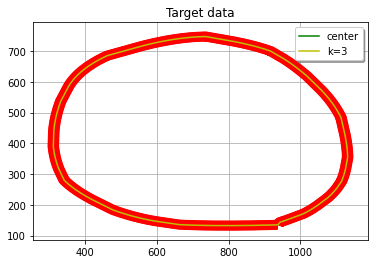

In [37]:
print(center)
plt.plot((maxX+minX)/2, (maxY+minY)/2, 'g', label="center")

for i in range(0, len(allpointsX)):
    plt.plot(allpointsX[i], allpointsY[i], 'r')
plt.plot(X_all, Y_all, 'y', label="k=3")
# plt.plot(x_new, y_new, 'b', label="diff")
plt.title("Target data")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


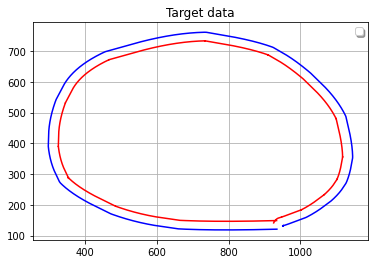

In [38]:
plt.plot(allpointsX[len(allpointsX)-1], allpointsY[len(allpointsY)-1], 'r')
plt.plot(allpointsX[len(allpointsX)-2], allpointsY[len(allpointsY)-2], 'b')
# plt.plot(X_all, Y_all, 'y', label="k=3")
# plt.plot(x_new, y_new, 'b', label="diff")
plt.title("Target data")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show()

In [148]:
last = 0
temp1 = 0
temp2=0

def position(theta, velocity, xpast, ypast):
    global last, x,y,l,r,d, temp1, temp2
    l=5
    r=5
    d=-1
    x = xpast+ velocity*0.1*math.cos(theta)
    y = ypast+ velocity*0.1*math.sin(theta)
    c = y-math.tan(np.deg2rad(theta))*x 
    # print(x,y,c)
    c2 = y-(1/math.tan(np.deg2rad(theta)))*x
    # print(c,c2)

    for i in range(0, len(allpointsX[0])-1): ## Finding distances on the left and the right of the vehicle
        cdash = allpointsY[len(allpointsY)-2][i] - math.tan(np.deg2rad(theta))*allpointsX[len(allpointsX)-2][i]
        if (cdash-c <5 or cdash-c>-5):
            temp1 = i
            # print(allpointsY[len(allpointsY)-2][i], allpointsX[len(allpointsX)][i])
            # print(xpast, ypast)
            l = sqrt(sqr(allpointsX[len(allpointsX)-2][i]-x) + sqr(allpointsY[len(allpointsY)-2][i]-y)).real
            r = sqrt(sqr(allpointsX[len(allpointsX)-1][i]-x) + sqr(allpointsY[len(allpointsY)-1][i]-y)).real
            break

    for i in range(0, len(allpointsX[0])): ## finding the distance in front of the car using same circle line logic
        d1 = 0
        d2=0
        
        cdash = allpointsY[len(
            allpointsY)-2][i] - math.tan(np.deg2rad(theta))*allpointsX[len(allpointsX)-2][i]
        cdash2 = allpointsY[len(allpointsY)-1][i] - \
            math.tan(theta)*allpointsX[len(allpointsX)-1][i]
        # print(cdash)
        if (cdash-c2<5 or cdash-c >-5):
            temp2 = i
            d1 = sqrt(sqr(allpointsX[len(allpointsX)-2][i]-x) + sqr(allpointsY[len(allpointsY)-2][i]-y)).real
        if (cdash2-c2<5 or cdash2-c2 >-5):
            if(i<temp2) : temp2 = i
            d2 = sqrt(sqr(allpointsX[len(allpointsX)-1][i]-x) + sqr(allpointsY[len(allpointsY)-1][i]-y)).real
        
        if(d2>d1):
            d = d1
        else: 
            d=d2

    if(temp1<temp2) :last=temp1
    else: last=temp2
    return x, y, l, r, d

xpos,ypos,left,right,ahead = position(-75, 1, X_all[0], Y_all[0])

print(xpos, ypos, left, right, ahead)

1056.0921751269725 183.03877816354094 14.025214747077122 13.9754553167295 214.49200066954148


This part of the code invloves a lot of vehicle dynamics and hence I will do it later on

In [ ]:
tempPopulation=[] #Storing iterations until a single crash
AllPopulation=[] #All the iterations will be stored here
lengthOfCar = 10
widthOfCar = 5

def newPop(theta, velocity, prevTheta, velocityTheta, Xpst, Ypst):
    global tempPopulation, AllPopulation
    deltatheta = velocityTheta-theta
    Rad = 
    
    

For now I'll just try to find a path on the track by generating random population and passing them into the genetic algo


In [39]:
tempPopulation=[]
AllPopulation=[]

def NextPosition(velocity, theta, xpast, ypast, anchor):
    global tempPopulation, AllPopulation,  iter, x, y, l, r, d, calculated, tempSlope1, tempSlope2, anglebw, whichSide
    x = xpast + velocity*0.1*math.cos(np.deg2rad(theta))
    y = ypast + velocity*0.1*math.sin(np.deg2rad(theta))
    # ghusa = 'no'


        ## Now we need the slope of the line horizontal to the vehicle which is perpendicular to the track and passes through the vehicle COM.
        ## Since we are now assuming that the vehicle is a point, the distance from the left and the right wall will be calculated from this line of slope
        ## the way we can implement this is by finding slope of allpoints(i+1) and allpoints(i) and checking if it is perpendicular to the slope bw allpoints(i) and (x,y)
        ## The anchor is just to reduce computation time, in a real life scenario it does even if it does not affect the time complexity.
    l=0 
    r=0
    d=0
    iter = 5
    anglebw = 0
    tempSlope1=0
    tempSlope2=0
    calculated = 0
    whichSide=990
    for i in range(0, len(allpointsY[len(allpointsY)-2])-1):
        if (((allpointsX[len(allpointsX)-2][i+1]-allpointsX[len(allpointsX)-2][i]) == 0 and (allpointsY[len(allpointsY)-2][i]-y) == 0) ): ## Slope = 0
            l = abs(x-allpointsX[len(allpointsX)-2][i])
            r = abs(x-allpointsX[len(allpointsX)-1][i])
            calculated = 1
        elif ((allpointsX[len(allpointsX)-2][i]-x) == 0 and ((allpointsY[len(allpointsY)-2][i+1]-allpointsY[len(allpointsY)-2][i] == 0))): ## slope = INF
            l = abs(y-allpointsY[len(allpointsY)-2][i])
            r = abs(x-allpointsY[len(allpointsY)-1][i])
            calculated=2
        elif ((allpointsX[len(allpointsX)-2][i+1]-allpointsX[len(allpointsX)-2][i]) == 0 or (allpointsX[len(allpointsX)-2][i]-x)==0):
            continue
        else :
            tempSlope1 = (allpointsY[len(allpointsY)-2][i+1]-allpointsY[len(allpointsY)-2][i])/(allpointsX[len(allpointsX)-2][i+1]-allpointsX[len(allpointsX)-2][i])
            tempSlope2 = (allpointsY[len(allpointsY)-2][i]-y)/(allpointsX[len(allpointsX)-2][i]-x)

        if (calculated==0):
            anglebw = int(tempSlope1*tempSlope2) ##using int because

            if(anglebw ==-1) :
                iter = i
                anchor = i
                l = sqrt(sqr(allpointsY[len(allpointsY)-2][i]-y) + sqr(allpointsX[len(allpointsX)-2][i]-x)).real
                r = sqrt(sqr(allpointsY[len(allpointsY)-1][i]-y) + sqr(allpointsX[len(allpointsX)-1][i]-x)).real

                mFront = -(1/tempSlope2)
                whichSide = 1 ## this is to see which side of the track latest in the front, we will see this which checking for the slope
                for i in range(0, len(allpointsY[len(allpointsY)-2])-1):
                    tempS = (allpointsY[len(allpointsY)-2][i]-y)/(allpointsX[len(allpointsX)-2][i]-x)
                    tempS2 = (allpointsY[len(allpointsY)-1][i]-y)/(allpointsX[len(allpointsX)-1][i]-x)

                    if(int(tempS*100)==int(mFront*100)):
                        iter = i
                        whichSide = 2
                    elif(int(tempS2*100)==int(mFront*100)):
                        iter = i
                        whichSide=1  

                if(whichSide):
                    d = sqrt(sqr(allpointsY[len(allpointsY)-1][i]-y) + sqr(allpointsX[len(allpointsX)-1][i]-x)).real
                else : 
                    d = sqrt(sqr(allpointsY[len(allpointsY)-2][i]-y) + sqr(allpointsX[len(allpointsX)-2][i]-x)).real
    if(calculated==1) : 
        tempD = sys.maxint
        for i in range(0, len(allpointsY[len(allpointsY)-2])-1):
            if(allpointsX[len(allpointsX)-2][i]==x):
                d = min(tempD, abs(y-allpointsY[len(allpointsY)-2][i]))
                break
            elif (allpointsX[len(allpointsX)-1][i] == x):
                d = min(tempD, abs(y-allpointsY[len(allpointsY)-1][i]))
                break
    elif(calculated==2):
        tempD = sys.maxint
        for i in range(0, len(allpointsX[len(allpointsX)-2])-1):
            if (allpointsY[len(allpointsY)-2][i] == y):
                d = min(tempD, abs(x-allpointsX[len(allpointsX)-2][i]))
                break
            elif (allpointsY[len(allpointsY)-1][i] == y):
                d = min(tempD, abs(x-allpointsX[len(allpointsX)-1][i]))
                break
    return x, y, l, r,d, anchor



In [29]:
## lets test the above funciton :
x,y,l,r,d,i, m = NextPosition(50,-5, X_all[100], Y_all[100])

print(X_all[100], Y_all[100], allpointsX[len(allpointsX)-2][i],allpointsY[len(allpointsY)-2][i])
print(x,y,l,r,d, m)

# print(sqrt(sqr(X_all[0]-allpointsX[len(allpointsX)-2][i]) +
#       sqr(Y_all[0]-allpointsY[len(allpointsY)-2][i])))
# tempSlope1 = (allpointsY[len(allpointsY)-2][i+1]-allpointsY[len(allpointsY)-2]
#               [i])/(allpointsX[len(allpointsX)-2][i+1]-allpointsX[len(allpointsX)-2][i])
# tempSlope2 = (allpointsY[len(allpointsY)-2]
#               [i]-y)/(allpointsX[len(allpointsX)-2][i]-x)

# print(tempSlope1, tempSlope2)


ValueError: too many values to unpack (expected 7)

The next block of code will generate all possible paths the vehicle can take until it hits a wall

In [42]:
slopeLim = abs((allpointsY[len(allpointsY)-1][0] - allpointsY[len(allpointsY)-2]
            [0])/(allpointsX[len(allpointsX)-1][0] - allpointsX[len(allpointsX)-2][0]))

print(slopeLim, math.atan(slopeLim))

anchor = 0

leftWall=4
rightWall=4
frontWall=4
Xstart=X_all[0]
Ystart=Y_all[0]

pop=[]
AllPop=[]
# AllPop.clear()

print(-math.ceil(int(math.atan(slopeLim))))

def getPopulation(): 
    global leftWall, rightWall, frontWall, Xstart, Ystart, AllPop, anchor, pop
    
    for i in range(-40,40, 10):
        print('hello')
        if(i==0): continue
        for j in range(1,3):
            print('hehe')
            ite = 0
            while(int(leftWall)>1 and int(rightWall)>1 and int(frontWall)>1 and ite<10 ):
                # print(i,j)
                Xstart, Ystart, leftWall, rightWall, frontWall, anchor= NextPosition(i, j, Xstart, Ystart, anchor)
                # print(Xstart, Ystart,leftWall, rightWall, frontWall)
                ite += 1
                temp = [Xstart, Ystart, leftWall, rightWall, frontWall, i, j]
                pop.append(temp)
               
            # print(pop)
            leftWall=2
            rightWall=2
            frontWall=4
            Xstart = X_all[0]
            Ystart = Y_all[0]
            AllPop.append(pop)
            pop=[]
            # print(pop)
getPopulation()
print(AllPop)

# print(len(AllPop))

32.72388059701551 1.540247110823573
-1
hello
hehe
hehe
hello
hehe
hehe
hello
hehe
hehe
hello
hehe
hehe
hello
hello
hehe
hehe
hello
hehe
hehe
hello
hehe
hehe
[[[930.0006092193744, 134.93019037425086, 750.040733834846, 722.0409854884576, 8.247971600640096, -40, 1], [926.0012184387488, 134.8603807485017, 747.1064717480394, 719.1065794816114, 7.083069204531625, -40, 1], [922.0018276581231, 134.79057112275257, 744.1856129226403, 716.1856406455679, 8.019395437774834, -40, 1], [918.0024368774975, 134.72076149700342, 741.269172046168, 713.2695455005011, 10.509592619061133, -40, 1], [914.0030460968719, 134.65095187125428, 738.3781345823433, 710.378351463834, 13.732893753679356, -40, 1], [910.0036553162463, 134.58114224550513, 735.5015061962129, 707.5016165615167, 17.283900158270633, -40, 1], [906.0042645356207, 134.511332619756, 732.639680154495, 704.6397245552562, 20.99700070277397, -40, 1], [902.0048737549951, 134.44152299400685, 729.7930552161115, 701.7930654762706, 24.799493388847974, -40, 

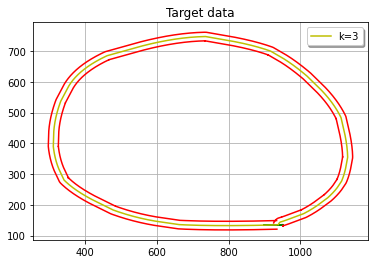

[[[930.0006092193744, 134.93019037425086, 750.040733834846, 722.0409854884576, 8.247971600640096, -40, 1], [926.0012184387488, 134.8603807485017, 747.1064717480394, 719.1065794816114, 7.083069204531625, -40, 1], [922.0018276581231, 134.79057112275257, 744.1856129226403, 716.1856406455679, 8.019395437774834, -40, 1], [918.0024368774975, 134.72076149700342, 741.269172046168, 713.2695455005011, 10.509592619061133, -40, 1], [914.0030460968719, 134.65095187125428, 738.3781345823433, 710.378351463834, 13.732893753679356, -40, 1], [910.0036553162463, 134.58114224550513, 735.5015061962129, 707.5016165615167, 17.283900158270633, -40, 1], [906.0042645356207, 134.511332619756, 732.639680154495, 704.6397245552562, 20.99700070277397, -40, 1], [902.0048737549951, 134.44152299400685, 729.7930552161115, 701.7930654762706, 24.799493388847974, -40, 1], [898.0054829743694, 134.3717133682577, 726.953067865522, 698.953390442416, 28.65581452645761, -40, 1], [894.0060921937438, 134.30190374250856, 724.139252

In [43]:
# for i in range (0, 100):
#     # for j in range(0, len(AllPop[i])-1):
#     plt.plot(AllPop[i], AllPop[i], 'g')
#     # print(AllPop[i], AllPop[i])
priX = []
priY = []
for i in range(0,len(AllPop)-1):
    for j in range(0, len(AllPop[i])-1):
        priX.append(AllPop[i][j][0])
        priY.append(AllPop[i][j][1])
    # print('hi')
plt.plot(priX, priY, 'g')
plt.plot(allpointsX[len(allpointsX)-2], allpointsY[len(allpointsY)-2], 'r')
plt.plot(allpointsX[len(allpointsX)-1], allpointsY[len(allpointsY)-1], 'r')
plt.plot(X_all, Y_all, 'y', label="k=3")
# plt.plot(x_new, y_new, 'b', label="diff")
plt.title("Target data")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show()
print(AllPop)

# for i in range(0, 100):
#     if(AllPop[i][0]==100):
#         print(AllPop[i])

# print(priX[600], priY[600])


### Genetic Algorithm 

In [44]:
def evaluateFittness(elem):
    global TotalFittness
    d = 0
    fitnessArr = []
    TotalFittness = 0
    for i in range(0, len(elem)-2):
        d+=sqrt(sqr(elem[i+1][1]-elem[i][1]) + sqr(elem[i+1][0]-elem[i][0])).real
        fit = (abs(elem[i][2]-elem[i][3]))*(d/(len(elem)*0.1)) ##(left - right)/time/distance
        fitnessArr.append(fit)

    for i in range(0, len(fitnessArr)-1):
        TotalFittness+=fit

    TotalFittness = TotalFittness/len(fitnessArr)
    return TotalFittness  

def mutate(elem1, elem2, x, y, i):
    theta= (elem1[5]+elem2[5])/2
    tempList = [elem1[6], elem2[6]]
    velocity = random.choice(tempList)

    xnew, ynew, lnew, rnew, dnew, anchor = NextPosition(theta, velocity, x, y, 0)
    newPop = [xnew, ynew, lnew, rnew, dnew, anchor, theta, velocity]

    return newPop

def selectFittestPopulations(generation, minFit):
    newGen = []
    for i in range(0, len(generation)-1):
        fit = evaluateFittness(generation[i])
        print(fit, 'select')
        if(fit>minFit):
            newGen.append(generation[i])
    
    print(newGen)
    return newGen    

def GenetiAlgo1(AllPop):
    minFit = 0
    newGeneration = []
    iter = 0
    while(minFit < 23144):
        iter+=1
        print(iter)
        if(iter!=1):
            newGeneration = selectFittestPopulations(newGeneration, minFit)
            AllPop=[]
            for i in range(0, len(newGeneration)-1):
                AllPop.append(newGeneration[i])
            newGeneration.clear()
            minFit=0
        for i in range(0, len(AllPop)-1):
            fit = evaluateFittness(AllPop[i]) ## EVALUATE fitness of a certain array of drive
            minFit+=fit ## add all these to get an average of them all
        minFit = minFit/len(AllPop)
        print(minFit, 'ih')
        if(minFit >= 23144): ## the limiting factor for out fitness (STOPPING CRITERIA)
            continue
        else: 
            for i in range(0, len(AllPop)-2):
                # print('i')
                newPopulation = [] #A new drive that we generate from the mutation
                xpast=0 ## we need to store this becuase the car won't just start from a random point each time we mutate therefore whenever we mutate 2 drives, we mutate their steerin angle and velocity, and from their now location which we get from xpast and y past we get the next position by calling the NextPosition() which we used to generate the initial population
                ypast=0
                a = len(AllPop[i])-1
                b=len(AllPop[i+1])-1
                for j in range(0, min(a,b )): ## since it is a 2d array, we take the first set of Drive and the last set of Drive
                    # print('j')
                    if(j==0):
                        xpast = AllPop[i][j][0] ## are going to mutate the first Drives path, therefore the position that we take in account of are from 1st drive list
                        ypast = AllPop[i][j][1]
                    else: 
                        xpast = newPopulation[j-1][0]
                        ypast = newPopulation[j-1][0]
                    newElem = mutate(AllPop[i][j], AllPop[i+1][j], xpast, ypast, i) ## mutate i and i+1
                    newPopulation.append(newElem)
                print(newPopulation)
                newGeneration.append(newPopulation)
    return AllPop


# print(min(len(AllPop[i])-1, len(AllPop[i+1]-1)))
print(GenetiAlgo1(AllPop), 'hi')


1
351.8037278280131 ih
[[926.003045911298, 134.79059238744085, 747.1543094528632, 719.1544226414683, 7.152861431350937, 538, -40.0, 2], [922.0054826032217, 925.863447924488, 202.88304623821952, 230.60737653187516, 783.9373954351968, 769, -40.0, 2], [918.0060918225961, 921.9356729774726, 197.96006307449358, 225.6881741071971, 780.0385783586645, 767, -40.0, 1], [914.0085285145198, 917.8664938357861, 192.90922842048673, 220.64104860091874, 776.0192458774336, 765, -40.0, 2], [910.0109652064434, 913.8689305277097, 187.94024424677957, 215.67498112971487, 772.0927366614914, 763, -40.0, 2], [906.0134018983671, 909.8713672196334, 182.98245558719142, 210.71954473169646, 768.1877635632384, 761, -40.0, 2], [902.0140111177415, 905.9435922726179, 177.9175628162945, 205.68880129137378, 764.3744681780853, 758, -40.0, 1], [898.0164478096651, 901.8744131309314, 172.91019233052313, 200.6834911291679, 760.4419911074534, 756, -40.0, 2], [894.0188845015888, 897.8768498228551, 167.98441439803028, 195.7590347

In [45]:
test=[]
for i in range(0, len(X_all)-1):
    slope = (Y_all[i+1]-Y_all[i])/(X_all[i+1]-X_all[i])
    temp = [X_all[i], Y_all[i], 5, 25, 10, slope, 3]
    test.append(temp)
print(test)
print(evaluateFittness(test))

[[934.0, 135.0, 5, 25, 10, 0.030558722919040604, 3], [930.601625, 134.89615, 5, 25, 10, 0.029998892212251906, 3], [927.2164999999999, 134.7946, 5, 25, 10, 0.029434661723821528, 3], [923.8446249999998, 134.69535, 5, 25, 10, 0.028865979381441413, 3], [920.4859999999999, 134.5984, 5, 25, 10, 0.028292792287861586, 3], [917.140625, 134.50375, 5, 25, 10, 0.027715046704432363, 3], [913.8084999999999, 134.4114, 5, 25, 10, 0.027132688034355333, 3], [910.4896249999999, 134.32134999999997, 5, 25, 10, 0.026545660805437802, 3], [907.1840000000001, 134.2336, 5, 25, 10, 0.0259539086525616, 3], [903.891625, 134.14815000000002, 5, 25, 10, 0.025357374299550692, 3], [900.6124999999998, 134.065, 5, 25, 10, 0.024755999540697068, 3], [897.346625, 133.98415000000003, 5, 25, 10, 0.024149725221946427, 3], [894.0939999999999, 133.9056, 5, 25, 10, 0.02353849122130535, 3], [890.8546249999999, 133.82934999999998, 5, 25, 10, 0.02292223642914333, 3], [887.6285, 133.7554, 5, 25, 10, 0.022300898727776252, 3], [884.415

### Forward-Looking Algorithm


In [46]:
import numpy as np


def forwardLookingAlgorithm(outerX, outerY, innerX, innerY, lookAheadDistance):
    outerX = np.array(outerX)
    outerY = np.array(outerY)
    innerX = np.array(innerX)
    innerY = np.array(innerY)
    # compute the centerline of the track
    centerlineX = 0.5 * (outerX + innerX)
    centerlineY = 0.5 * (outerY + innerY)

    # compute the cumulative arc length along the centerline
    arcLengths = np.zeros_like(centerlineX)
    for i in range(1, len(arcLengths)):
        arcLengths[i] = arcLengths[i-1] + np.sqrt(
            (centerlineX[i]-centerlineX[i-1])**2 + (centerlineY[i]-centerlineY[i-1])**2)

    # initialize the racing line as the centerline
    racingLineX = centerlineX.copy()
    racingLineY = centerlineY.copy()

    # iterate over the centerline points
    for i in range(len(centerlineX)):
        # find the next point on the centerline that is lookahead distance away
        j = i
        while j < len(centerlineX)-1 and arcLengths[j+1]-arcLengths[i] < lookAheadDistance:
            j += 1

        # check if we can move to the left or right of the centerline
        if i > 0:
            leftX, leftY = computeLeftPoint(
                centerlineX[i], centerlineY[i], centerlineX[i-1], centerlineY[i-1])
            if isFeasible(leftX, leftY, racingLineX, racingLineY):
                racingLineX[i] = leftX
                racingLineY[i] = leftY

        if j < len(centerlineX)-1:
            rightX, rightY = computeRightPoint(
                centerlineX[j], centerlineY[j], centerlineX[j+1], centerlineY[j+1])
            if isFeasible(rightX, rightY, racingLineX, racingLineY):
                racingLineX[j] = rightX
                racingLineY[j] = rightY

    return racingLineX, racingLineY


def computeLeftPoint(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    length = np.sqrt(dx**2 + dy**2)
    nx = -dy / length
    ny = dx / length
    leftX = x1 + nx
    leftY = y1 + ny
    return leftX, leftY


def computeRightPoint(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    length = np.sqrt(dx**2 + dy**2)
    nx = dy / length
    ny = -dx / length
    rightX = x1 + nx
    rightY = y1 + ny
    return rightX, rightY


def isFeasible(x, y, racingLineX, racingLineY):
    for i in range(len(racingLineX)):
        if np.sqrt((x-racingLineX[i])**2 + (y-racingLineY[i])**2) > 15:
            return False
    return True


raceX, raceY = forwardLookingAlgorithm(
    allpointsX[len(allpointsX)-2], allpointsY[len(allpointsY)-2], allpointsX[len(allpointsX)-1], allpointsY[len(allpointsY)-1], 1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


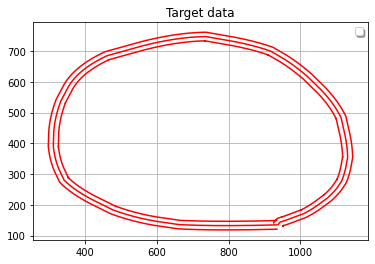

In [47]:

plt.plot(raceX, raceY, 'r')
plt.plot(allpointsX[len(allpointsX)-2], allpointsY[len(allpointsY)-2], 'r')
plt.plot(allpointsX[len(allpointsX)-1], allpointsY[len(allpointsY)-1], 'r')
# plt.plot(X_all, Y_all, 'y', label="k=3")
# plt.plot(x_new, y_new, 'b', label="diff")
plt.title("Target data")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show()



### forward Looking algorithm with a probability distribution

In [49]:
allX =[]
allY=[]
m=[]
k_all=[]
localIteration= 0
maxK=0
# theta = 0
theta = np.arctan2((Y_all[1]-Y_all[0]),(X_all[1]-X_all[0]))
print(np.cos(theta))
velocity = 3
xstart = X_all[0]
ystart = Y_all[0]


def radius_of_curvature(x1, y1, x2, y2, x3, y3):
    """
    Calculate the radius of curvature of a curve defined by three points.
    The points are (x1, y1), (x2, y2), and (x3, y3).
    """
    a = math.sqrt((x2-x1)**2 + (y2-y1)**2)
    b = math.sqrt((x3-x2)**2 + (y3-y2)**2)
    c = math.sqrt((x3-x1)**2 + (y3-y1)**2)
    s = (a + b + c) / 2.0
    area = math.sqrt(s*(s-a)*(s-b)*(s-c))
    radius = (a*b*c) / (4.0*area)
    return radius

# def getmaxK():
#     for i in range(len(allpointsX[len(allpointsX)-10])):
#         m.append(radius_of_curvature(
#             allpointsX[len(allpointsX)-1][i], allpointsY[len(allpointsY)-1][i], allpointsX[len(allpointsX)-2][i+1], allpointsY[len(allpointsY)-2][i+1]))
#     for i in range(m):
#         maxK = max(maxK, m[i])
# getmaxK()

print(len(allpointsX[len(allpointsX)-3]))

def localizeCar(k):
    found = False
    for i in range(0, len(X_all)-1):
        if (sqrt(sqr(xstart-X_all[i]) + sqr(ystart-Y_all[i])).real < 12 and found==False):
            k = i
            found = True
            # print(found)
            # print('in')
            
    return k
for i in range(0,len(allpointsX[len(allpointsX)-3])-5):
    # print(i)
    localIteration = i
    
    i = localizeCar(localIteration)
    # print(i)
    k1 = radius_of_curvature(
        X_all[i], Y_all[i], X_all[i+1], Y_all[i+1], X_all[i+2], Y_all[i+2])
    k2 = radius_of_curvature(
        X_all[i+2], Y_all[i+2], X_all[i+3], Y_all[i+3], X_all[i+4], Y_all[i+4])
    k_all.append(k1)
    k_all.append(k2)
    # m.append(min(max((k2-k2)/maxK, -1),1))
    # print(allX, allY)
    if(k1>1000 and k2>1000):
        # print('first')
        xstart = xstart+velocity*0.1*np.cos(theta)
        ystart = ystart+velocity*0.1*np.sin(theta)
        allX.append(xstart)
        allY.append(ystart)

    elif (k1> 1000 and k2 <= 1000):
        # print('sec')
        theta -=np.pi*10/k2
        xstart = xstart+velocity*0.1*np.cos(theta)
        ystart = ystart+velocity*0.1*np.sin(theta)
        allX.append(xstart)
        allY.append(ystart)
    elif(k1<=1000 and (k2<=1000 or k2>1000)):
        # print('third')
        theta +=np.pi*10/k1
        xstart = xstart+velocity*0.1*np.cos(theta)
        ystart = ystart+velocity*0.1*np.sin(theta)
        allX.append(xstart)
        allY.append(ystart)
    
# print(k_all)
# print((
#     allpointsX[len(allpointsX)-1][100], allpointsY[len(allpointsY)-1][100], allpointsX[len(allpointsX)-2][99], allpointsY[len(allpointsY)-2][99]))
# # print(allX, allY)

-0.9995334089908124
1544


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


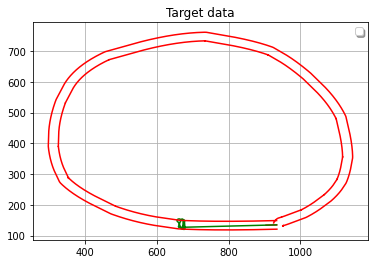

In [51]:
tempx=[]
tempy=[]
for i in range(0, 100):
    tempx.append(allX[i])
    tempy.append(allY[i])
plt.plot(tempx, tempy, 'r')
plt.plot(allX, allY, 'g')
plt.plot(allpointsX[len(allpointsX)-2], allpointsY[len(allpointsY)-2], 'r')
plt.plot(allpointsX[len(allpointsX)-1], allpointsY[len(allpointsY)-1], 'r')
# plt.plot(X_all, Y_all, 'y', label="k=3")
# plt.plot(x_new, y_new, 'b', label="diff")
plt.title("Target data")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show()
